# Bike Sharing assignment

by

##### Remella Satya Ramana Kumar

## Importing of Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("S:\day.csv",low_memory=False)

# Data Inspection

In [4]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
data.shape

(730, 16)

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Convert the column names according to our understanding**

In [9]:
data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
data.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
data.shape

(730, 16)

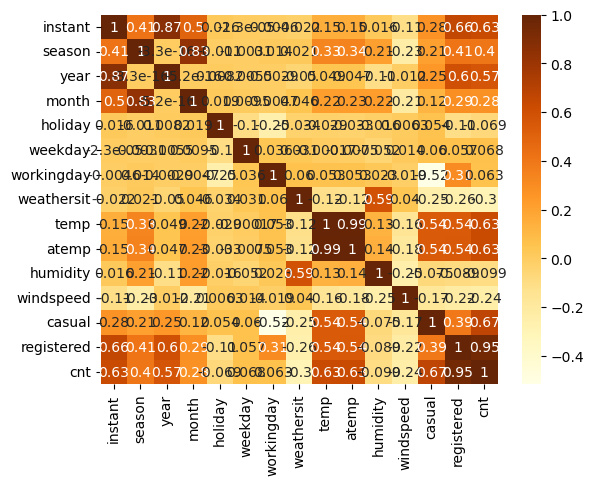

In [12]:
c = data.corr()
sns.heatmap(c, cmap="YlOrBr", annot = True)
plt.show()

**Drop instant column because id of a bike is of no use**

**Drop dteday column brecause it is of no use**

**Drop casual and registered column because cnt is the target variable**

In [13]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [14]:
data

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


**Mapping of variables**

In [15]:
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light',4:'Heavy'})

In [16]:
data

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [17]:
data.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
       dtype='object')]

- The following columns are categorical variables **weathersit** , **weekday** , **season** , **month** and cannot be correlated

In [18]:
data.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


# Data Visualization

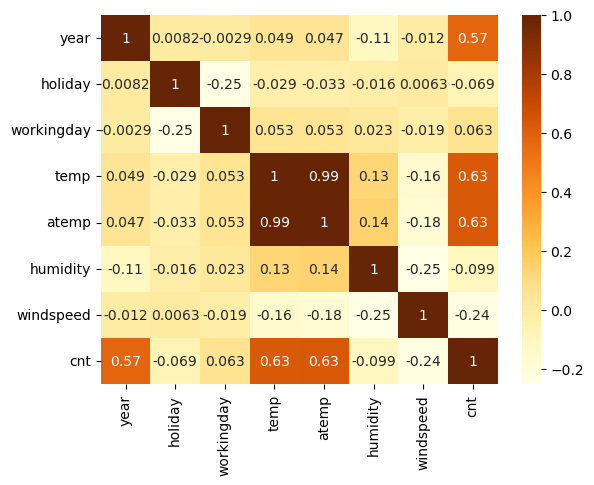

In [19]:
c = data.corr()
sns.heatmap(c, cmap="YlOrBr", annot = True)
plt.show()

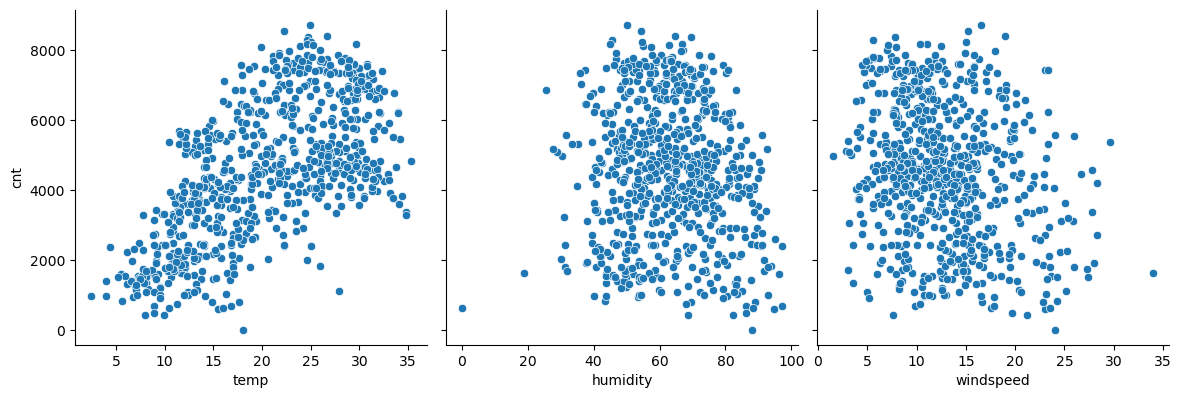

In [20]:
sns.pairplot(data, x_vars=['temp','humidity','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

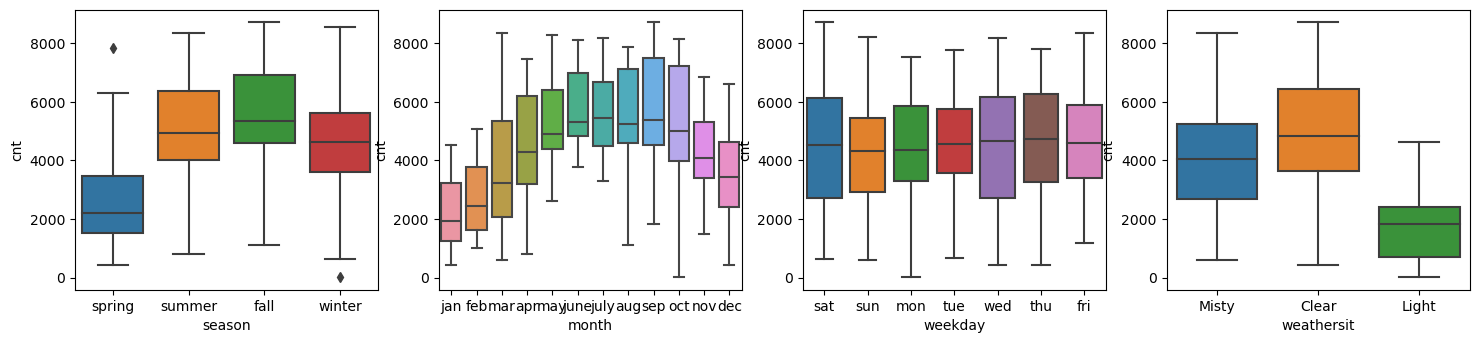

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

### Categorical values distributon

In [22]:
data = pd.get_dummies(data = data , columns = ['weekday' , 'season' , 'month'],drop_first=True)
data = pd.get_dummies(data=data,columns=["weathersit"])

In [23]:
data.axes 

[RangeIndex(start=0, stop=730, step=1),
 Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
        'windspeed', 'cnt', 'weekday_mon', 'weekday_sat', 'weekday_sun',
        'weekday_thu', 'weekday_tue', 'weekday_wed', 'season_spring',
        'season_summer', 'season_winter', 'month_aug', 'month_dec', 'month_feb',
        'month_jan', 'month_july', 'month_june', 'month_mar', 'month_may',
        'month_nov', 'month_oct', 'month_sep', 'weathersit_Clear',
        'weathersit_Light', 'weathersit_Misty'],
       dtype='object')]

In [24]:
data.shape

(730, 31)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   humidity          730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   weekday_mon       730 non-null    uint8  
 9   weekday_sat       730 non-null    uint8  
 10  weekday_sun       730 non-null    uint8  
 11  weekday_thu       730 non-null    uint8  
 12  weekday_tue       730 non-null    uint8  
 13  weekday_wed       730 non-null    uint8  
 14  season_spring     730 non-null    uint8  
 15  season_summer     730 non-null    uint8  
 16  season_winter     730 non-null    uint8  
 1

# Regression data preparation 

### Data into Training and Testing Sets

**Assign Target variable to y**

In [26]:
y = data.pop('cnt')

**Rest of data to X**

In [27]:
X =data

### Test train split 

- A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set.

- We are taking Train split as 70 percent and Test split as 30 percent.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7 ,test_size=0.3, random_state=100)

In [29]:
X_train.shape

(510, 30)

In [30]:
X_test.shape

(219, 30)

In [31]:
y_train.shape

(510,)

In [32]:
y_test.shape

(219,)

In [33]:
X_train.head

<bound method NDFrame.head of      year  holiday  workingday       temp     atemp  humidity  windspeed  \
653     1        0           1  19.201653  23.04230   55.8333  12.208807   
576     1        0           1  29.246653  33.14480   70.4167  11.083475   
426     1        0           0  16.980847  20.67460   62.1250  10.792293   
728     1        0           0  10.489153  11.58500   48.3333  23.500518   
482     1        0           0  15.443347  18.87520   48.9583   8.708325   
..    ...      ...         ...        ...       ...       ...        ...   
526     1        0           1  29.554153  32.98605   58.7917  13.916771   
578     1        0           1  30.852500  35.35440   65.9583   8.666718   
53      0        0           1   9.091299  12.28585   42.3043   6.305571   
350     0        0           0  10.591653  12.46855   56.0833  16.292189   
79      0        0           1  17.647835  20.48675   73.7391  19.348461   

     weekday_mon  weekday_sat  weekday_sun  ...  month_ju

### Min max scaling of continous variables

In [34]:
# Continous varable 
var = ['temp','atemp','humidity','windspeed']

scaler = MinMaxScaler()

#Fit and transform training set only
X_train[var] = scaler.fit_transform(X_train[var])

In [35]:
X_train.head

<bound method NDFrame.head of      year  holiday  workingday      temp     atemp  humidity  windspeed  \
653     1        0           1  0.509887  0.501133  0.575354   0.300794   
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
..    ...      ...         ...       ...       ...       ...        ...   
526     1        0           1  0.824514  0.762183  0.605840   0.355596   
578     1        0           1  0.863973  0.824359  0.679690   0.187140   
53      0        0           1  0.202618  0.218747  0.435939   0.111379   
350     0        0           0  0.248216  0.223544  0.577930   0.431816   
79      0        0           1  0.462664  0.434043  0.759870   0.529881   

     weekday_mon  weekday_sat  weekday_sun  ...  month_july  month_ju

- Fitting of **X_train** and **Y_train** Linear regresssion

#### RFE

- Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

**No of features can be any number but we are taking 15 in our case.** 

In [36]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)

# RFE 

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', False, 14),
 ('windspeed', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 15),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('month_aug', False, 10),
 ('month_dec', False, 2),
 ('month_feb', False, 16),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 11),
 ('month_mar', False, 9),
 ('month_may', False, 8),
 ('month_nov', False, 3),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light', True, 1),
 ('weathersit_Misty', True, 1)]

## OLS 

- The ordinary least squares (OLS) algorithm is a method for estimating the parameters of a linear regression model. The OLS algorithm aims to find the values of the linear regression model's parameters (i.e., the coefficients) that minimize the sum of the squared residuals.

In [38]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

## VIF

- A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

In [39]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

**RFE selectected columns**

In [40]:
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'windspeed', 'weekday_sat',
       'weekday_sun', 'season_spring', 'season_winter', 'month_jan',
       'month_july', 'month_sep', 'weathersit_Clear', 'weathersit_Light',
       'weathersit_Misty'],
      dtype='object')

# Model Building 

**The initial columns selected by the RFE is taken and we are building a model**

In [41]:
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'weekday_sat',
       'weekday_sun', 'season_spring', 'season_winter', 'month_jan',
       'month_july', 'month_sep', 'weathersit_Clear', 'weathersit_Light',
       'weathersit_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.12e-188
Time:                        18:22:50   Log-Likelihood:                -4118.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     496   BIC:                             8325.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              630.4990    142.133  

**P value of 'weekday_sun' is greater than 0.05 so we can take that column out and we can continue building**

In [42]:
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'weekday_sat',
        'season_spring', 'season_winter', 'month_jan',
       'month_july', 'month_sep', 'weathersit_Clear', 'weathersit_Light',
       'weathersit_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.12e-188
Time:                        18:22:50   Log-Likelihood:                -4118.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     496   BIC:                             8325.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              672.7137    175.323  

**VIF of Weathersit_clear is 26.14 which is greater than 10 and we can ignore that column and continue building it further**

In [43]:
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'weekday_sat',
        'season_spring', 'month_july',
       'weathersit_Light', 'weathersit_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.75e-184
Time:                        18:22:51   Log-Likelihood:                -4136.2
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     499   BIC:                             8341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2361.1658    183.155  

**P value of 'holiday' is greater than 0.05 so we can take that column out and we can continue building**

In [44]:
cols = ['year',  'workingday', 'temp', 'windspeed', 'weekday_sat',
        'season_spring', 'month_july',
       'weathersit_Light', 'weathersit_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.15e-185
Time:                        18:22:52   Log-Likelihood:                -4137.7
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     500   BIC:                             8338.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2295.0782    179.140  

**The r2 value is not fluctuating and VIF of on column is 6.06 so we can eliminate 'weekday_sat' column and try**

### Assumptions:

- The **R-squared value is 0.829** , **Adjusted R-Squared value is 0.825** and the **VIF ,  P values are in also ideal** so we can take this as our final model.
- The difference between R-squared and Adjusted R-squared is very less,hence no additional parameters that can be removed from this model.

### Build a regression model that can select the features automatically

In [45]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [46]:
#Let us build the finalmodel using sklearn
cols = ['year',  'workingday', 'temp', 'windspeed', 'weekday_sat',
        'season_spring', 'month_july',
       'weathersit_Light', 'weathersit_Misty']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)

In [47]:
print(lr.coef_)

[ 2043.33719591   446.66361107  3526.85747275 -1399.82482571
   558.85660227 -1280.22524158  -712.81927375 -2411.87043993
  -711.74114189]


In [48]:
print(lr.intercept_)

2295.0781942541475


## Residual Analysis and Homoscedasticity

In [49]:
y_train_pred = lr.predict(X_train[cols])

Text(0.5, 0, 'Errors')

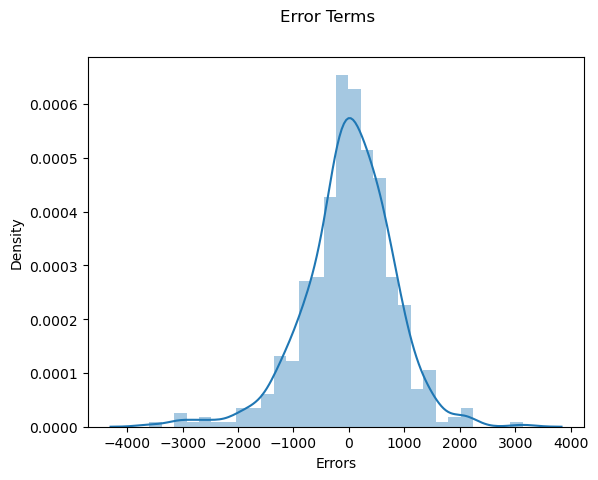

In [50]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(y_train - y_train_pred)
fig.suptitle('Error Terms') 
plt.xlabel('Errors')

**As we can observe the Error terms are normally distributed**

- Homoscedasticity means a situation in which the variance of the dependent variable is the same for all the data.

### R-Squared of y_train and y_train_pred

In [51]:
r2_score(y_train,y_train_pred)

0.8285059559048416

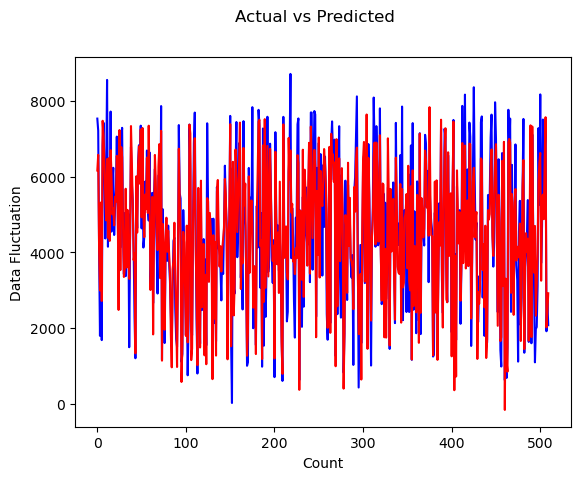

In [52]:
n = [i for i in range(0,len(X_train),1)]
plt.plot(n,y_train, color="blue")
plt.plot(n,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted')
plt.xlabel('Count')
plt.ylabel('Data Fluctuation')
plt.show()

Text(0, 0.5, 'y_train_pred')

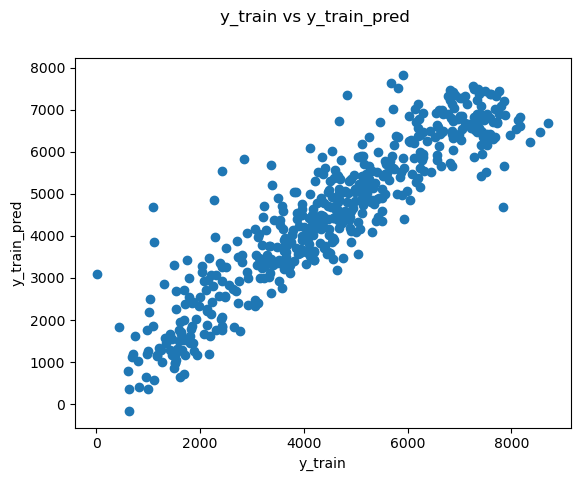

In [53]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred')          
plt.xlabel('y_train')                         
plt.ylabel('y_train_pred')

**The R-squared of our final data set is matching with the obtained data set so we are good**

In [54]:
#Scale variables in X_test
var = ['temp','atemp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[var] = scaler.transform(X_test[var])

In [55]:
#Columns from our final model
cols = ['year',  'workingday', 'temp', 'windspeed', 'weekday_sat',
        'season_spring', 'month_july',
       'weathersit_Light', 'weathersit_Misty']

#Predict the values for test data
y_pred = lr.predict(X_test[cols])

### R-Squared of y_test and y_test_pred

In [56]:
r2_score(y_test,y_pred)

0.803388171097712

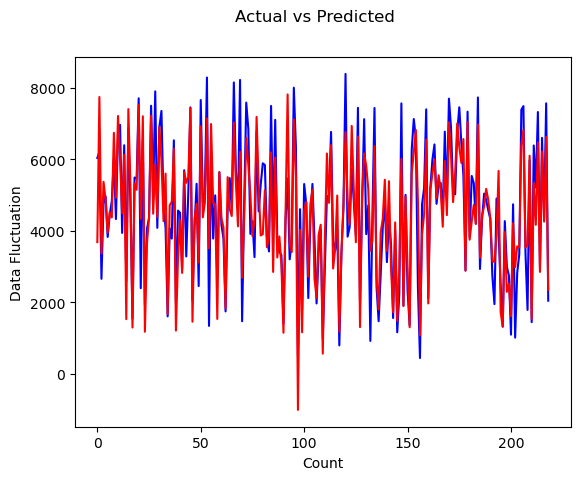

In [57]:
n = [i for i in range(0,len(X_test),1)]
plt.plot(n,y_test, color="blue")
plt.plot(n,y_pred, color="red")
plt.suptitle('Actual vs Predicted')
plt.xlabel('Count')
plt.ylabel('Data Fluctuation')
plt.show()

Text(0, 0.5, 'y_pred')

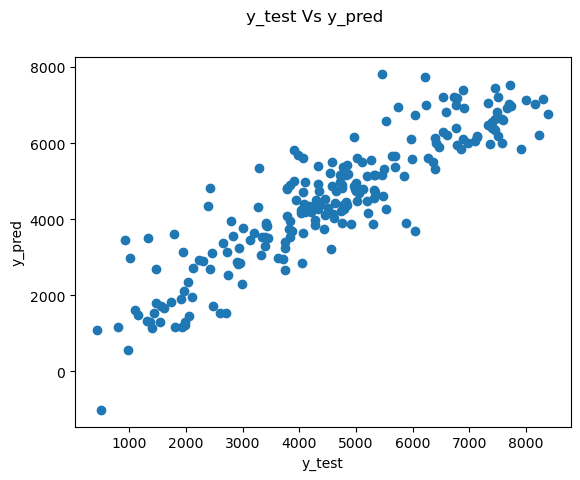

In [58]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test Vs y_pred')          
plt.xlabel('y_test')                         
plt.ylabel('y_pred')

# Final Model 

In [59]:
cols = ['year',  'workingday', 'temp', 'windspeed', 'weekday_sat',
        'season_spring', 'month_july',
       'weathersit_Light', 'weathersit_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.15e-185
Time:                        18:23:02   Log-Likelihood:                -4137.7
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     500   BIC:                             8338.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2295.0782    179.140  

# Conclusions 

- The Co Efficients for the model are (2043.33719591, 446.66361107, 3526.85747275, -1399.82482571,
   558.85660227, -1280.22524158,  -712.81927375, -2411.87043993, 
  -711.74114189).

- The Intercept for the model is 2295.0781942541475.

- The R-squared for y_train and y_train_pred is 0.8285059559048416.

- The R-squared for y-test and y_pred is 0.803388171097712.

**The difference between R-squared of y_train and y_test is very less so our model is good**

In [60]:
print(cols)

['year', 'workingday', 'temp', 'windspeed', 'weekday_sat', 'season_spring', 'month_july', 'weathersit_Light', 'weathersit_Misty']


### Significant variables to predict the demand for shared bikes:

- Year (yr)
- Workingday (workingday)
- Temperature (temp)
- Windspeed (windspeed)
- Weekday saturday (weekday_sat)
- Spring Season (season_spring)
- July Month (month_july)
- Weather Sit Light (weathersit_Light)
- Weathersit Misty (weathersit_Misty)

### The conclusion is that the model changes according to the features selected  by RFE and the R-squared, Adjusted R-squared values accordingly.